In [10]:
class Star():
	'''
	inputs
	------

	'''
	def __init__(self, Mass): # initaionliing the class with mass
		self.mass=Mass #giving star class atribute mass
		self.calc_rest() # profoming calc_rest fucntion definded below
		self.Dead=False # Giving star atribute dead and initalizing it to false i.e. star is alive
		self.Blown=False
	
	def calc_rest(self): #defining calc_rest 
		self.TMS=10**10 *(self.mass)**(-3.5) # calculating the time on the main sequnce 
	
	def Wind(self): # setting up wind procedure for stars past MS
		if self.Blown==True: #checking for wind 
			print("Star's wind already accounted for") # rpinting error message
			return 0 # retunring 0 mass to ism
		else:
			if self.mass<=8: # for stars less than 8 solar masses
				self.Blown==True
				return 0.05*self.mass
			elif self.mass>=3: # for stars greater than or equal to 8 solar masses
				self.Blown==True
				return 0.05*self.mass
			else:
				return 0

	def Kill(self): # setting up Kill funciton
		if self.Dead==True: # checking if star has not already been killed
			print("Star already Dead ", self.mass) # Printing warning
			return 0 # retuening 0 mass to ism
		else:
			if self.mass>8: # for massive stars
				self.dead=True #setting the dead atribute to true
				if self.mass<50: # for less massive set mass for neutron star as reminent
					self.mass=1.4 # setting mass for reminent
				else:
					self.mass=3.0 # setting mass of remeninat for very massive stars.
				return sum([0.1,0.1,0.1,0.3]) # returning masses of elemens given to ISM  [C,N,O,Fe]
			elif self.mass<=8: # for non massive stars
				self.dead=True# setting dead to True
				self.mass=0
				return sum([0.3,0.3,0.3,0.3])# returning masses of elemens given to ISM  [C,N,O,Fe]



In [16]:
x=Star(10)
x.TMS

3162277.6601683795

In [19]:
t=10000
x.TMS*1.1>t

True

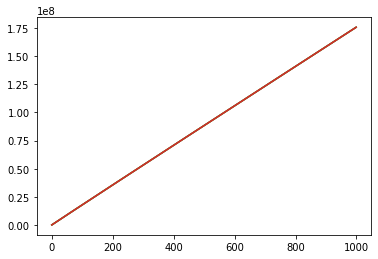

In [10]:
from astropy.io import ascii
import matplotlib.pyplot as plt
Data=ascii.read('OutputBig.csv')
plt.plot(Data['C'])
plt.plot(Data['N'])
plt.plot(Data['O'])
plt.plot(Data['Fe'])